# Previsões: Copa do Mundo da FIFA - Catar 2022
<div align="justify">
<br>
A Copa do Mundo é uma competição internacional realizada pela Federação Internacional de Futebol Associação(FIFA) que ocorre de quatro em quatro anos. Durante esse período entre copas as seleções passam por diversas competições dentro de seu próprio continente e por diversos amistosos. Esse período conta também com as eliminatórias, que buscam reduzir o número de equipes que competem no Mundial. Teoricamente, essas seriam as melhores seleções do Mundo nesse período preparatório e a coroação da melhor ocorreria com a taça do mundial. Considerado atualmente o evento esportivo mais assistido no mundo e economicamente possui potencial gigantesco.
<br>
<img src="https://cdn.pixabay.com/photo/2018/06/14/16/36/football-3475163_960_720.jpg" width="800" height="1000">

Os jogos realizados nesse período demonstram o potencial dessas seleções e suas forças. A partir das partidas, gols feitos, gols levados, ataques, cartões, impedimentos e diversas outras variáveis montam-se rankings das seleções, um desses é o Ranking FIFA. No entanto, ainda possuímos o Ranking ELO, que possuem jeitos de cálculos diferentes e podem apresentar rankeamento diferenciado entre as seleções.

A questão é que por mais que tentamos atribuir valores para as incertezas que estão intrisecas a natureza do próprio esporte, não podemos dar com certeza o que de fato irá acontecer em uma competição por esses valores. O fato do espaço de possibilidades ser tão grande é o que torna tão interessante. Estatisticamente falando a variância presente nos jogos de futebol é grande o suficiente para a própria incerteza das previsões estatísticas. Essa variância grande coloca nos detalhes as questões que podem definir o placar e uma partida. Com isso, se repetirmos uma partida com os mesmos times 100 vezes, teríamos diversas partidas com valores diferentes e não somente um resultado.
    
Por isso, quando estamos fazendo um modelo para a previsão de uma partida, ou da copa, estamos quantificando todas as incertezas que podem acontecer. Vamos pegar como exemplo 10 partidas de Brasil x França, é possivel que aconteça:

<ol>
   <li>Brasil 1 x 2 França</li>
   <li>Brasil 2 x 0 França</li>
   <li>Brasil 1 x 0 França</li>
   <li>Brasil 1 x 1 França</li>
   <li>Brasil 2 x 1 França</li>
   <li>Brasil 0 x 3 França</li>
   <li>Brasil 1 x 1 França</li>
   <li>Brasil 2 x 1 França</li>
   <li>Brasil 1 x 7 França</li>
   <li>Brasil 5 x 0 França</li>
</ol>

Todos esses resultados são possíveis, mas veja que alguns aconteceram com mais frequência do que outros. Assim, a tentativa estatística não é prever exatamente o que vai acontecer, mas quantificar os placares que podem acontecer a partir das variáveis disponíveis. No nosso exemplo acima, por exemplo, o mais provável é que o Brasil ganhe, mas nada impede que a França ganhe, só seria menos provável.

Uma frase que sempre me vem na mente quando vejo qualquer previsão estatística sobre futebol veio de Marco Tardelli, ex-jogador italiano que venceu a Copa do Mundo de 1982 onde o Brasil foi eliminado pela itália por 3 a 2. Nessa frase Tardelli reflete perfeita mente sobre a imprevisibilidade do futebol e a probabilidades baixas aconteçam: "Se nós jogassemos 20 vezes contra o Brasil nós perderiamos 19, menos naquele dia".

Dessa forma, o objetivo desse projeto é a criação de um modelo para a previsão de resultados dos jogos da copa do mundo e como resultado final a previsão do vencedor da copa. Essa modelagem não tem a pretenção de fazer uma representação do real, mas entregar um equacionamento útil para a quantificação das probabilidades que podem ocorrer.
</div>

## Previsão da Partida:
<br>
<div align="justify">

Prever o resultado de uma Copa nada mais é do que prever seu campeão. Para prevermos o campeão de uma copa precisamos antes prever: a partida da final, as semis, as quartas, as oitavas e a fase de grupo. Ou seja, tudo passa pela previsão de partidas individuais.
    
Dessa forma, a primeira questão que nos é colocada é: como podemos prever o resultado de uma partida individual?

Uma alternativa poderia ser pegar as médias de gols de cada seleção e arredondarmos para um número inteiro, dessa forma, caso uma seleção tenha média de gols mais alta do que a outra, a ela seria atrelada a vitória, caso a média seja a mesma, a partida seria considerada empate.
    
No entanto, essa solução retiraria diversas aleatoriedades que podem acontecer para o resultado de uma partida, pois, a média de gols de uma seleção poderia ser de diversos outros resultados possíveis. 

Das diversas possibilidades de soluções, a distribuição de Poisson é uma que pode nos ajudar nesse problema, pois ela é a principal referência para a análise de dados de contanges (0, 1, 2, 3) e será resumida a seguir.
</div>

### Distribuição Poisson:
<br>
<div align="justify">

Resumidamente, a distribuição de Poisson descreve resultados de experiências nos quais contamos acontecimentos que ocorrem aleatoriamente, mas com uma taxa média definida. Ela é aplicável quando o número de possiveis ocorrências de um valor (como a quantidade de gols de um time em uma partida) é muito maior do que o número médio de ocorrências. 
    
Um segundo argumento para sua utilização é porquê diversos pesquisadores utilizaram essa distribuição para previsão em seus modelos futebolísticos. A quantidade de artigos demonstrando que para dados de futebol, contagens de gols em partidas, é uma boa opção ja sendo foi confirmada em diversos artigos.

Para sua utilização só precisamos da média de uma variável, ou seja, a quantidade média de gols. Com isso, jogamos a quantidade média de gols esperada de um time em como λ (lambda) na formula. A letra 'x' seria a quantidade de gols para tal partida. Com esses dois parâmetros a função nos retornaria a probabilidade de x gols em uma partida para um time de média λ.
    
<img src="https://study.com/cimages/multimages/16/poisson1a.jpg">

<h4>Resultado da Partida:</h4>

Primeiro, com a distribuição de Poisson calculamos a probabilidade da seleção fazer uma quantidade número de gols em uma partida. A segunda questão que nos é colocada agora é: como calcular o resultado de uma partida?
    
Tratando como a probabilidade de uma seleção ser independente da outra, poderiamos calcular o placar esperado multiplicando a probabilidade de cada quantidade de gols de uma seleção, pela probabilidade da outra. A imagem abaixo nos ajuda a entender essa ideia.

<img src="https://fivethirtyeight.com/wp-content/uploads/2018/06/boice-WORLDCUP-02.png?w=712">
    
Na parte superior à direita temos a Distribuição de Probabilidade de Poisson para a seleção brasileira. Veja que a probabilidade da seleção fazer 2 gols é muito maior do que a de outros resultados, nossa média deve ficar por volta desse valor.
    
Em baixo, à esquerda, temos a Distribuição de Probabilidade de Poisson para a Croácia. Atente-se que a probabilidade da corácia fazer 0 gols em uma partida é muito grande.
    
Ambos os valores foram vistos para a previsão da copa de 2014.
    
Dessa forma, para obtermos as probabilidades dos placares, basta multiplicar as probabilidades das duas seleções. Como resultado tem-se o Heatmap na parte de baixo à direita. 

Interpretá-lo é muito simples: a probabilidade de um placar de 2 a 0 para o Brasil é de 19%, ou seja, seria o placar mais provável. No entanto, prever placares é muito mais arriscado do que prever o resultado de uma partida no geral e para fazermos isso basta somarmos todos os resultados que resultariam em tal acontecimento, por exemplo:
    
- A Probabilidade de Empate na partida é a soma das probabilidades de empate em cada resultado (0 x 0, 1 x 1, 2 x 2, etc.);  
- A Probabilidade de Vitória do Brasil é a soma das probabilidades das combinações de placares em que ele vence (1 x 0, 2 x 1, 2 x 0, 7 x 1, etc.);
- A Probabilidade de Vitória da Crácia é a soma das probabilidades de todas as combinações em que ele vence (1 x 0, 2 x 1, 2 x 0, 7 x 1, etc.).

Assim, obteremos as probabilidades de resultado da partida.
    
Resumindo, a distribuição de gols de duas seleções, vamos considerar 1 e 2, respectivamente são:
    S¹ ~ Poisson(m1)
    s² ~ Poisson(m2)
Onde:  
m1 - média de gols da seleção 1;
m2 - média de gols da seleção 2.

Em que S¹ e S² são independentes.
    
E para obter as probabilidades de resultado da partida multiplicamos S¹ com S².
</div>

### Média de Gols de Cada Time em uma Partida
<br>
<div align="justify">
Com o bloco anterior resolvemos o problema de previsão de resultado da partida, no entanto, quando olhamos para a fórmula apresentada anteriormente nos defrontamos com outro problema: como definir a média de gols de cada time em uma partida?

Novamente, esse problema poderia apresentar diversas soluções. Uma delas seria a própria média histórica de gols de cada time. No entanto, a copa do mundo possui peculiaridades que simplesmente a média de cada time não captasse. Jogar amistosos e campeonatos continentais não é a mesma coisa do que jogar a copa do mundo, da mesma forma que jogar em 1950 não é jogar como em 2022.

O gráfico abaixo, retirado do site globo.com, mostra como caminhou a média de gols ao longo das competições. Dessa média histórica podemos interpretar que historicamente as médias ficam em grande maioria entre 2 e 3 gols por partida. Dessa forma, iremos considerar uma média de 2,5 gols para essa copa.

<img src="https://uploaddeimagens.com.br/images/004/172/056/full/Captura_da_Web_22-11-2022_11926_ge.globo.com.jpeg?1669090784">

    m = m¹ + m²
    m = 2,75
    
Nosso trabalho agora é distribuir a quantidade de gols que iria para cada equipe em uma partida. Para isso usaremos o conceito de "fator de força". Esse fator, que é utilizado por diferentes rankings, tenta quantificar o quão poderosa é uma seleção. Se nos colocarmos esse fator entre seleções em porcentagem e multiplicarmos pela média de gols considerada teremos a quantidade de cada seleção para jogarmos na fórmula de Poisson. É o que está descrito na fórmula abaixo:

    m¹ = m . f¹ / (f¹ + f²)
    m² = m - m²
    
Onde:
m  - média de gols da partida (aqui definimos o valor de 2,5);
m¹ - média de gols da seleção 1;
m² - média de gols da seleção 2;
f¹ - força da Seleção 1;
f² - força da Seleção 2.

E por fim, a última questão a ser resolvida é: como definir o fator de força de uma seleção?
    
A forma de cálculo da força utilizada em nosso trabalho será algo simples. Como o <b>Ranking da Fifa</b> e o <b>Ranking Elo</b> apresenta divergencia na pontuação das seleções, iremos fazer uma média simples ta transformação da pontuação de ambos em um intervalo (a, 1), com "a" no nosso projeto sendo 0,15. Nesse caso, a seleção mais fraca de cada ranking terá o valor 0,15 e a seleção mais forte 1.
</div>

### Utilização do Python:

#### Importando as blibliotecas necessárias:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import poisson

#### Lendo os dados:

Nos dados a seguir teremos os pontos dos rankins das seleções e mais algumas informações.

In [2]:
selecoes = pd.read_excel('DadosCopaDoMundoQatar2022.xlsx', sheet_name='selecoes', index_col=0)
jogos = pd.read_excel('DadosCopaDoMundoQatar2022.xlsx', sheet_name='jogos')

In [3]:
selecoes.head()

,Grupo,GrupoNumero,NomeEmIngles,PosiçãoRankingFIFA,ValorDeMercado,PontosRankingFIFA,PosiçãoEloRating,PontosEloRating,Confederação,Copas,JogadorDestaque,FotoJogadorDestaque,LinkBandeiraPequena,LinkBandeiraGrande
Seleção,,,,,,,,,,,,,,
Brasil,G,G1,Brazil,1,1090.0,1841,1,2185,CONMEBOL,5,Neymar Jr.,https://github.com/ricardorocha86/PrevisaoEspo...,https://cloudinary.fifa.com/api/v3/picture/fla...,https://flagdownload.com/wp-content/uploads/Fl...
Bélgica,F,F1,Belgium,2,559.0,1816,8,1948,UEFA,0,Kevin De Bruyne,https://github.com/ricardorocha86/PrevisaoEspo...,https://cloudinary.fifa.com/api/v3/picture/fla...,https://flagdownload.com/wp-content/uploads/Fl...
Argentina,C,C1,Argentina,3,608.0,1774,2,2101,CONMEBOL,2,Lionel Messi,https://github.com/ricardorocha86/PrevisaoEspo...,https://cloudinary.fifa.com/api/v3/picture/fla...,https://flagdownload.com/wp-content/uploads/Fl...
França,D,D1,France,4,886.0,1759,4,2046,UEFA,2,Kylian Mbappé,https://github.com/ricardorocha86/PrevisaoEspo...,https://cloudinary.fifa.com/api/v3/picture/fla...,https://flagdownload.com/wp-content/uploads/Fl...
Inglaterra,B,B1,England,5,1360.0,1728,10,1944,UEFA,1,Harry Kane,https://github.com/ricardorocha86/PrevisaoEspo...,https://cloudinary.fifa.com/api/v3/picture/fla...,https://flagdownload.com/wp-content/uploads/Fl...


#### Fator de Força:

Agora estamos gerando o fator de força para cada seleção, veja que nesse caso a seleção brasileira é considerada como a mais forte para a copa, em segunda posição vem a Argentina.

In [4]:
elorating = np.array(selecoes['PontosEloRating']).reshape(-1, 1)
MinMax = MinMaxScaler(feature_range=(0.15, 1))
newelorating = MinMax.fit_transform(elorating)

fifarating = np.array(selecoes['PontosRankingFIFA']).reshape(-1, 1)
newfifarating = MinMax.fit_transform(fifarating)

ref = (newelorating + newfifarating) / 2

selecoes["forca"] = ref

forca = selecoes["forca"]

In [5]:
forca

Seleção
Brasil            1.000000
Bélgica           0.814346
Argentina         0.879044
França            0.827234
Inglaterra        0.728131
Espanha           0.792326
Holanda           0.758738
Portugal          0.723897
Dinamarca         0.658381
Alemanha          0.645253
México            0.545951
Uruguai           0.629086
Estados Unidos    0.540757
Croácia           0.650075
Suíça             0.617357
Senegal           0.445302
País de Gales     0.439271
Irã               0.480308
Marrocos          0.372767
Japão             0.463949
Sérvia            0.515573
Polônia           0.489044
Coreia do Sul     0.440537
Tunísia           0.347657
Costa Rica        0.390325
Camarões          0.263626
Austrália         0.356964
Canadá            0.343264
Equador           0.437371
Catar             0.211404
Arábia Saudita    0.259386
Gana              0.150000
Name: forca, dtype: float64

In [6]:
# Transformação Linear de Escala Numérica
#rat = selecoes["forca"]
#a, b = min(rat), max(rat)
#fa, fb = 0.15, 1

#b1 = (fb - fa)/(b-a)
#b0 = fb - b*b1
#forca = b0 + b1*rat

#### Médias e Resultados:

Abaixo geramos as funções para a distribuição da média de gols para cada seleção e obtenção, a partir de uma Poisson, um resultado aleatório de gols para a partida.

In [7]:
# Encontrando M1 e M2
def MediasPoisson(selecao1, selecao2, data=forca, mgols=2.5):
    # Pegando do Dataframe a força de cada seleção
    forca1 = forca[selecao1]
    forca2 = forca[selecao2]
    
    # Obtenção dos gols para o time 1
    l1 = mgols*forca1/(forca1+forca2)
    # Obtenção dos gols para o time 2
    l2 = mgols - l1
    # Retorno
    return l1, l2

def Jogo(selecao1, selecao2):
    # Pegando as médias de gols para cada seleção da função anterior
    l1, l2 = MediasPoisson(selecao1, selecao2)
    
    # Obtendo de uma Poisson um valor inteiro randômico para gols do time 1, a partir da sua média
    gols1 = int(np.random.poisson(lam = l1, size=1))
    # Obtendo de uma Poisson um valor inteiro randômico para gols do time 2, a partir da sua média
    gols2 = int(np.random.poisson(lam = l2, size=1))
    
    # Saldo de gols do time 1
    saldo1 = gols1 - gols2
    # Salo de gols do time 2
    saldo2 = gols2 - gols1
    
    # Obtenção da quantidade de Pontos para cada seleção
    pontos1, pontos2, resultado = Pontos(gols1, gols2)
    
    # Formato de exibição
    placar = '{}x{}'.format(gols1, gols2)
    
    # Retorno dos: gols, saldo, pontos e o placar
    return [gols1, gols2, saldo1, saldo2, pontos1, pontos2, resultado, placar]

# FUNÇÕES AUXILIARES
def Resultado(gols1, gols2):
    # Se o time 1 fez mais gols do que o time 2, então ele V = VENCEU
    if gols1 > gols2:
        resultado = 'V'
    # Se o time 1 fez a mesma quantidade de gols do que o time 2, então ele E = Empatou
    elif gols1 == gols2:
        resultado = 'E'
    # Se não aconteceu nenhum dos dois, ele perdeu
    else:
        resultado = 'D'
    return resultado

def Pontos(gols1, gols2):
    rst = Resultado(gols1, gols2)
    # Se a saída da Função Resultado for vitória, o time 1 ganhou 3 pontos e o time 2 não ganhou nada
    if rst == 'V':
        pontos1, pontos2 = 3, 0
    # Se a saída da Função Resultado for empate, o time 1 ganhou 1 pontos e o time 2 ganhou 1
    if rst == 'E':
        pontos1, pontos2 = 1, 1
    # Se a saída da Função Resultado for derrota, o time 1 ganhou 0 pontos e o time 2 ganhou 3
    if rst == 'D':
        pontos1, pontos2 = 0, 3
    return [pontos1, pontos2, rst]

In [8]:
# É por meio dessa diferença de forças que os placares se diferenciam para cada partida.

# No caso abaixo, 1,33 gols foram para o Brasil e 1,17 foram para a Argentina, somando dá 2,5
print('Brasil x Argentina')
print(MediasPoisson('Brasil', 'Argentina'))

# No caso abaixo, 0,81 gols foram para o Catar e 1,69 foram para o Equador, somando dá 2,5
print('Catar x Equador')
print(MediasPoisson('Catar', 'Equador'))

Brasil x Argentina
(1.3304636235252418, 1.1695363764747582)
Catar x Equador
(0.8146267153322221, 1.685373284667778)


In [9]:
# Simulando um Jogo entre Brasil e Argentina
sim1 = Jogo('Brasil', 'Argentina')
print("Gols do Brasil:", sim1[0])
print("Gols da Argentina:", sim1[1])
print("Saldo de Gols do Brasil:", sim1[2])
print("Saldo de Gols da Argentina:", sim1[3])
print("Pontos Brasil:", sim1[4])
print("Pontos Argentina:", sim1[5])
print("Brasil venceu, empatou ou perdeu?", sim1[6])
print("Placar da Partida:", sim1[7])

Gols do Brasil: 1
Gols da Argentina: 1
Saldo de Gols do Brasil: 0
Saldo de Gols da Argentina: 0
Pontos Brasil: 1
Pontos Argentina: 1
Brasil venceu, empatou ou perdeu? E
Placar da Partida: 1x1


Veja que cada vez que a Função for rodada ela gera novos placares. Pois, a partir da distribuição de probabilidade, gera valores a partir da própria incerteza inerente ao futebol. Essa função gera o resultado para um Jogo somente, temos agora que rodar essa função infinitas vezes para ver quais resultados mais ocorreriam. Assim, temos as probabilidades de cada resultado e como consequência o resultado mais provável e improvável para a partida.

In [10]:
def Distribuicao(media):
    # Lista para colocarmos as probabilidade
    probs = []
    
    # Executar a função de Poisson para a média de gols do time até x = 7.
    for i in range(7):
        probs.append(poisson.pmf(i, media))
    # Obtendo a probabilidade da quantidade de gols ser maior ou igual a 7
    probs.append(1 - sum(probs))
    
    # Retorno das probabilidades
    return pd.Series(probs, index=['0', '1', '2', '3', '4', '5', '6', '7+'])

def ProbabilidadesPartidas(selecao1, selecao2):
    
    # Gerando a média para cada seleção
    l1, l2 = MediasPoisson(selecao1, selecao2)
    # Usando a função anterior para gerar a distribuição de probabilidade
    d1, d2 = Distribuicao(l1), Distribuicao(l2)
    # Gerando uma matriz da multiplicação das probabilidades
    matriz = np.outer(d1, d2)
    # Somando o triangulo inferior para a probabilidade de vitória do time 1
    vitoria = np.tril(matriz).sum() - np.trace(matriz)  #Soma o triâgulo inferior
    # Somando o triângulo superior para a probabilidade de derrota do time 1
    derrota = np.triu(matriz).sum() - np.trace(matriz)  #Soma o triângulo superior
    # Obtedo a probabilidade de empate
    empate = 1 - (vitoria + derrota)
    
    # Arredondando para 3 casas decimais e definindo o padrão de porcentagem
    probs = np.around([vitoria, empate, derrota], 3)
    probsp = [f'{100*i:.1f}%' for i in probs]
    
    # Transformando a matriz de multiplicação em um dataframe e modificando os nomes dos indices e das colunas
    nomes = ['0', '1', '2', '3', '4', '5', '6', '7+']
    matriz = pd.DataFrame(matriz, columns=nomes, index=nomes)
    matriz.index = pd.MultiIndex.from_product([[selecao1], matriz.index])
    matriz.columns = pd.MultiIndex.from_product([[selecao2], matriz.columns])
    
    # Saída da função um dicionário
    output = {
        'seleção1': selecao1,
        'seleção2': selecao2,
        'f1': forca[selecao1],
        'f2': forca[selecao2],
        'media1': l1,
        'media2': l2,
        'probabilidades': probsp,
        'matriz': matriz
    }
    return output

def GerarHeatmap(selecao1, selecao2):
    tab = ProbabilidadesPartidas(selecao1, selecao2)
    
    fig, ax = plt.subplots(figsize=(15,6))
    ax = sbn.heatmap(tab['matriz'], fmt=".5f", annot=True, cmap="crest", ax=ax,
                    yticklabels=[0, 1, 2, 3, 4, 5, 6, "7+"], xticklabels=[0, 1, 2, 3, 4, 5, 6, "7+"])

    ax.set_title("Probabilidade: " + tab["seleção1"] + " x " + tab["seleção2"], fontsize=25, pad=25)
    ax.set_xlabel(tab["seleção2"], fontsize=16, labelpad=15, loc='left')
    ax.set_ylabel(tab["seleção1"], fontsize=16, labelpad=15, loc='top')
    ax.xaxis.set_label_position("top")
    ax.xaxis.tick_top()

    plt.xticks(fontsize="14")
    plt.yticks(fontsize="14")

    return plt.show()

In [11]:
# Gerando as probabilidades dos resultados para um Jogo entre Brasil e Argentina
ProbabilidadesPartidas('Brasil', 'Argentina')

{'seleção1': 'Brasil',
 'seleção2': 'Argentina',
 'f1': 1.0,
 'f2': 0.879044233750574,
 'media1': 1.3304636235252418,
 'media2': 1.1695363764747582,
 'probabilidades': ['40.4%', '26.9%', '32.7%'],
 'matriz':           Argentina                                                    \
                   0         1         2         3         4         5   
 Brasil 0   0.082085  0.096001  0.056139  0.021885  0.006399  0.001497   
        1   0.109211  0.127726  0.074690  0.029118  0.008514  0.001991   
        2   0.072651  0.084968  0.049686  0.019370  0.005663  0.001325   
        3   0.032220  0.037682  0.022035  0.008590  0.002512  0.000588   
        4   0.010717  0.012534  0.007329  0.002857  0.000835  0.000195   
        5   0.002852  0.003335  0.001950  0.000760  0.000222  0.000052   
        6   0.000632  0.000740  0.000432  0.000169  0.000049  0.000012   
        7+  0.000144  0.000168  0.000098  0.000038  0.000011  0.000003   
 
                                        
          

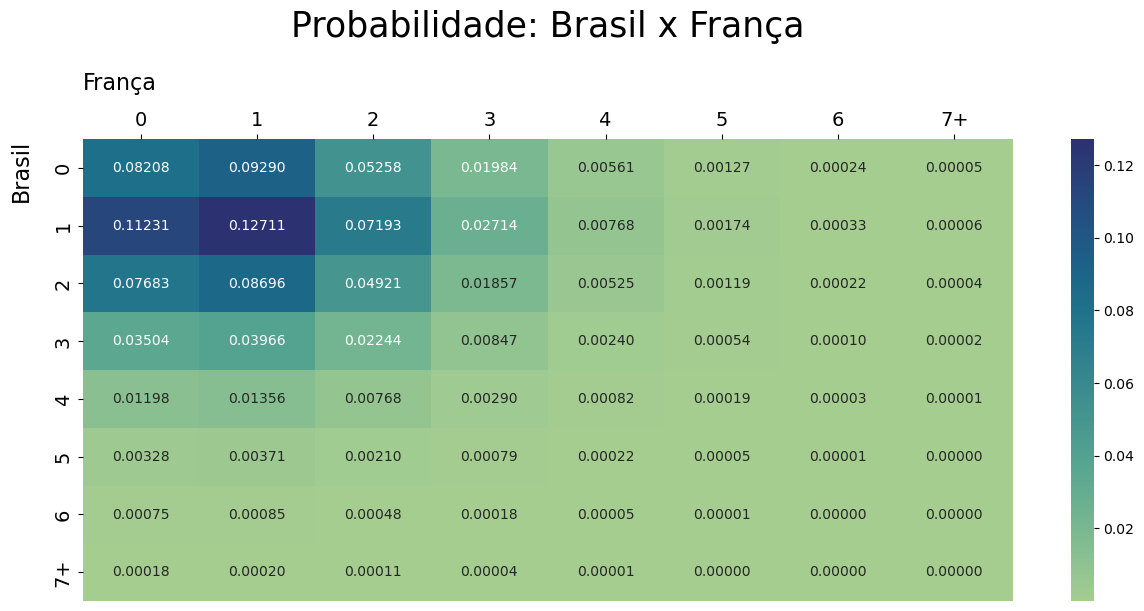

In [12]:
GerarHeatmap("Brasil", "França")

<div align="justify">
Ao executarmos, obtemos que a probabilidade de Vitória do Brasil em uma disputa com a Argentina é de 40,4%, enquanto a probabilidade de Vitória da Argentina é de 32,7%. Esse valor é discricionado no Heatmap acima, nele podemos ver a probabilidade de cada resultado, exemplificando, a probabilidade de 2 a 1 para o Brasil é de 8,7%. O placar mais provável contém 12,71% de chances de acontecer, 1 a 1. O segundo placar mais provável seria uma vitória de 1 a 0 para o Brasil, com 11,23% de probabilidade.
<br><br>
Agora podemos executar essa função para todos os jogos que irão acontecer na fase de grupos da competição. Assim, iremos obter a probabilidade dos resultado. O resultado que temos como referência é sempre a partir da seleção na variável "seleção1".
</div>

In [13]:
jogos['Vitória'] = None
jogos['Empate'] = None
jogos['Derrota'] = None

for i in range(jogos.shape[0]):
    selecao1 = jogos['seleção1'][i]
    selecao2 = jogos['seleção2'][i]
    
    v, e, d = ProbabilidadesPartidas(selecao1, selecao2)['probabilidades']
    jogos.at[i, 'Vitória'] = v
    jogos.at[i, 'Derrota'] = d
    jogos.at[i, 'Empate'] = e

In [14]:
jogos

,data,hora,grupo,seleção1,seleção2,estádio,Vitória,Empate,Derrota
0,2022-11-21,07:00:00,A,Senegal,Holanda,AL THUMAMA,22.1%,25.3%,52.6%
1,2022-11-21,13:00:00,A,Catar,Equador,AL KHOR,17.9%,24.0%,58.1%
2,2022-11-25,10:00:00,A,Catar,Senegal,AL THUMAMA,17.6%,23.9%,58.6%
3,2022-11-25,13:00:00,A,Holanda,Equador,INTER. KHALIFA,53.1%,25.2%,21.7%
4,2022-11-29,12:00:00,A,Holanda,Catar,AL KHOR,71.1%,19.6%,9.4%
5,2022-11-29,12:00:00,A,Equador,Senegal,INTER. KHALIFA,36.0%,27.0%,37.0%
6,2022-11-21,10:00:00,B,Inglaterra,Irã,INTER. KHALIFA,49.1%,25.9%,25.0%
7,2022-11-21,16:00:00,B,Estados Unidos,País de Gales,AL RAYYAN,42.8%,26.7%,30.5%
8,2022-11-25,07:00:00,B,País de Gales,Irã,AL RAYYAN,33.9%,27.0%,39.2%
9,2022-11-25,16:00:00,B,Inglaterra,Estados Unidos,AL KHOR,45.5%,26.4%,28.0%


Vamos salvar essa tabel em excel para que possamos fazer representações visuais em outros frameworks.

In [15]:
# Gravando os resultados em um arquivo excel.
jogos.to_excel('estimativasJogosCopa.xlsx')

## Previsão da Copa do Mundo
<br>
<div align="justify">
Já passamos pela previsão de gols de um time em uma partida e pela probabilidade de resultados do confronto entre times. Nosso trabalho, por fim, é aplicar as funções acima simulando os grupos definidos no sorteio da copa.
<br>
Após simularmos os grupos, conseguimos pegas os dois primeiros classificados e passarmos para as oitavas de finais, a partir da lógica adotada pela FIFA para a definição dos confrontos. Simulando novamente o resultado de cada jogos conseguimos ir passando fase por fase até chegarmos à final.
</div>


### Primeira Fase - Fase de Grupos
<br>
<div align="justify">
Criamos uma função para que simulemos todos os jogos internos em um grupo. Dela obtemos as pontuações, saldo de gols, gols prós. Precisamos de tudo isso para a definição dos critérios de desempates caso ocorram pontuações iguals. Por fim, ordenamos o Dataframe por cada critério de prioridade.
</div>

In [16]:
# Função para simular um grupo
def JogosGrupo(dados, grupo):
    
    # Selecionamos um grupo e obtemos somente os times que fazem parte dele
    times = list(dados[dados['Grupo'] == grupo].index)
    time1, time2, time3, time4 = times
    
    # Simulamos todos os possíveis confrontos e dele obtemos os resultado, saldo de gols e etc.
    jogo1 = Jogo(time1, time2)
    jogo2 = Jogo(time3, time4)
    jogo3 = Jogo(time1, time3)
    jogo4 = Jogo(time2, time4)
    jogo5 = Jogo(time1, time4)
    jogo6 = Jogo(time2, time3)
    
    # Criando variáveis vazias para irmos preenchendo conforme os jogos acontecem
    pt1, pt2, pt3, pt4 = 0, 0, 0, 0
    gp1, gp2, gp3, gp4 = 0, 0, 0, 0
    sg1, sg2, sg3, sg4 = 0, 0, 0, 0
    
    # Preenchemos para o confronto 1 as variáveis
    gp1, gp2, sg1, sg2, pt1, pt2 = gp1 + jogo1[0], gp2 + jogo1[1], sg1 + jogo1[2], sg2 + jogo1[3], pt1 + jogo1[4], pt2 + jogo1[5]
    # Preenchemos para o confronto 2 as variáveis
    gp3, gp4, sg3, sg4, pt3, pt4 = gp3 + jogo2[0], gp4 + jogo2[1], sg3 + jogo2[2], sg4 + jogo2[3], pt3 + jogo2[4], pt4 + jogo2[5]
    # Preenchemos para o confronto 3 as variáveis
    gp1, gp3, sg1, sg3, pt1, pt3 = gp1 + jogo3[0], gp3 + jogo3[1], sg1 + jogo3[2], sg3 + jogo3[3], pt1 + jogo3[4], pt3 + jogo3[5]
    # Preenchemos para o confronto 4 as variáveis
    gp2, gp4, sg2, sg4, pt2, pt4 = gp2 + jogo4[0], gp4 + jogo4[1], sg2 + jogo4[2], sg4 + jogo4[3], pt2 + jogo4[4], pt4 + jogo4[5]
    # Preenchemos para o confronto 5 as variáveis
    gp1, gp4, sg1, sg4, pt1, pt4 = gp1 + jogo5[0], gp4 + jogo5[1], sg1 + jogo5[2], sg4 + jogo5[3], pt1 + jogo5[4], pt4 + jogo5[5]
    # Preenchemos para o confronto 6 as variáveis
    gp2, gp3, sg2, sg3, pt2, pt3 = gp2 + jogo6[0], gp3 + jogo6[1], sg2 + jogo6[2], sg3 + jogo6[3], pt2 + jogo6[4], pt3 + jogo6[5]
    
    # Juntamos tudo em um Dataframe unificado, com uma coluna para os pontos, uma para o saldo de gols e uma para gols prós
    # Colocamos como índices o nome das variáveis e os nomes dos times
    tab = pd.DataFrame([[pt1, pt2, pt3, pt4], [sg1, sg2, sg3, sg4], [gp1, gp2, gp3, gp3]], 
                       columns=[time1, time2, time3, time4],
                       index = ['Pontos', 'Saldo de Gols', 'Gols Pró']).T

    # Ordenamos primeiro pelo Pontos, Depois pelo Saldo de Gols e por fim pelos Gols Pró. E ordenamos do maior para o menor.
    tab = tab.sort_values(by = ['Pontos', 'Saldo de Gols', 'Gols Pró'], ascending=False)
    tab['Posição'] = [1, 2, 3, 4]
    
    # Nome dos times em cada Partida
    partidas = [
        time1 + ' x ' + time2,
        time3 + ' x ' + time4,
        time1 + ' x ' + time3,
        time2 + ' x ' + time4,
        time1 + ' x ' + time4,
        time2 + ' x ' + time3,
    ]
    
    # Resultado de cada jogo
    resultados = [jogo1[6], jogo2[6], jogo3[6], jogo4[6], jogo5[6], jogo6[6]]
    # Plcar dos jogos
    placares = [jogo1[-1], jogo2[-1], jogo3[-1], jogo4[-1], jogo5[-1], jogo6[-1]]

    # Criando um Dataframe unificado dos resultados acima
    jogos = pd.DataFrame([partidas, placares, resultados]).transpose()
    jogos.columns = ['Partidas', 'Placar', 'Resultado']
    
    # Retornamos uma lista dos dois Dataframes criados
    return [tab, jogos]

### Segunda Fase - Eliminatórias
<br>
<div align="justify">
A fase eliminatória possui uma peculiaridade que deverá ser abarcada pelo nosso modelo: disputa de pênaltis.
<br><br>
Como dito nas explicações iniciais do projeto, modelagens não tem a pretenção de fazer uma representação fiel do real, mas entregar um equacionamentos útil para a quantificação das probabilidades. Assim, abstraímos muitos fatores e concluímos que teoricamente, se duas seleções empataram em uma fase mata-mata, elas possuem as mesmas possibilidades e capacidades de avançar de fase. Assim, uma escolha randomica entre as duas seria uma possibilidade viável.
</div>

In [17]:
def JogoMataMata(selecao1, selecao2):
    # Simula um jogo entre duas seleções
    jogo = Jogo(selecao1, selecao2)
    # Gravando o resultado do jogo
    resultado = jogo[6]
    
    # Se a seleção1 venceu, ela é retornada na função e passa de fase
    if resultado == 'V':
        return selecao1
    # Se a seleção 1 perdeu, então quem passa é a seleção2, ela será retornada pela função
    elif resultado == 'D':
        return selecao2
    # Caso ocorra empate, a escolha será randomica entre elas
    else:
        return random.sample([selecao1, selecao2], 1)[0]

Com todas as funções construídas, podemos unificar tudo em somente uma função Geral e simular uma copa como um todo.

In [18]:
np.zeros(47*9).reshape(9, 47)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
    

In [19]:
# Função Para Simular uma Copa
def SimulaCopa(selecoes):
    # Nome das Colunas será as fases
    cols = ['1st', '2sd', '3rd', '4th', 'Oitavas', 'Quartas', 'Semis', 'Final', 'Campeão']
    
    # Coletamos a quantidadde de seleções
    n = selecoes.shape[0]
    # A quantidade de fases
    m = len(cols)
    
    # 1 - Cria-se um array de 0, na quantidade de fases * número de seleções
    # 2 - Reorganiza para que cada lista (9) conte com 47 zeros (número de seleções)
    # 3 - Iremos Transformar em um DataFrame e transformar em valores inteiros
    # 4 - Esse DataFrame será utilizado para preenchimento de 0 se o time não ficou naquela posição (1 ou 2 ou 3 ou 4 do grupo)
    # ou 1 se ficou. E coloca 0 se náo alcançou aquela fase (oitavas, quartas, semis ou final) ou 1 se alcançou.
    aux = np.array(np.zeros(n*m).reshape(n, m))
    info = pd.DataFrame(aux, columns=cols, index=selecoes.index)
    info = info.astype(int)
    
    # As oitavas contam com 16 times, temos que pegar esses times que passaram de fase, simulando os grupos iremos ober a 
    # posição de cada time no grupo e em seguida procurar eles em nosso Dataframe e adicionar o valor 1 para a posição que
    # o time ficou no grupo.
    top16 = []
    
    # Para cada grupo
    for i in list('ABCDEFGH'):
        #Simular as partidas e pegar a tabela
        a = JogosGrupo(selecoes, grupo = i)[0]
        a.index[:2].tolist()
        
        # Adicionando os 2 primeiros em uma lista dos que passaram para a outra fase
        top16 += a.index[:2].tolist()
        # Pegando todas as seleções
        anomes = a.index.tolist()
        # Atribuindo ao que ficou na primeira posição o valor 1 na coluna de primeira colocação
        # A pesquia é feita por meio do nome na seleção no índice
        info.at[anomes[0], '1st'] = 1
        # Atribuindo ao que ficou na segunda posição o valor 1 na coluna de segunda colocação
        info.at[anomes[1], '2sd'] = 1
        # Atribuindo ao que ficou na terceira posição posição o valor 1 na coluna de terceira colocação
        info.at[anomes[2], '3rd'] = 1
        # Atribuindo ao que ficou na quarta posição o valor 1 na coluna de primeira colocação colocação
        info.at[anomes[3], '4th'] = 1
    
    # Simula as chaves das oitavas e coleta os ganhadores
    qf1 = JogoMataMata(top16[0], top16[3])    
    qf2 = JogoMataMata(top16[2], top16[1])    
    qf3 = JogoMataMata(top16[4], top16[7])    
    qf4 = JogoMataMata(top16[6], top16[5])    
    qf5 = JogoMataMata(top16[8], top16[11])    
    qf6 = JogoMataMata(top16[10], top16[9])
    qf7 = JogoMataMata(top16[12], top16[15])
    qf8 = JogoMataMata(top16[14], top16[13])

    # Adiciona os ganhadores em uma lista para as quartas
    top8 = [qf1, qf2, qf3, qf4, qf5, qf6, qf7, qf8]
    
    # Simula a chave das quartas
    sf1 = JogoMataMata(top8[0], top8[3])
    sf2 = JogoMataMata(top8[2], top8[1])
    sf3 = JogoMataMata(top8[4], top8[7])
    sf4 = JogoMataMata(top8[6], top8[5])
    
    # Adiciona os ganhadores das quartas em uma lista para as semis
    top4 = [sf1, sf2, sf3, sf4]

    # Simula os jogos das Semis
    f1 = JogoMataMata(sf1, sf3)
    f2 = JogoMataMata(sf2, sf4)

    # Adiciona para a final
    top2 = [f1, f2]
    
    # Simula o jogo da fina
    top1 = JogoMataMata(f1, f2)

    # Na tabela procura cada time e adiciona o 1 a eles nas colunas referentes
    info.loc[top16, 'Oitavas'] = 1
    info.loc[top8, 'Quartas'] = 1
    info.loc[top4, 'Semis'] = 1
    info.loc[top2, 'Final'] = 1
    info.loc[top1, 'Campeão'] = 1
    
    # Retorna o Dataframe com os valores
    return info

Agora podemos simular uma copa somente para obter o resultado. Cada vez que for rodado, pode ser que um novo campeão seja tido. No caso abaixo foi a seleção da França.

In [20]:
SimulaCopa(selecoes=selecoes)

,1st,2sd,3rd,4th,Oitavas,Quartas,Semis,Final,Campeão
Seleção,,,,,,,,,
Brasil,1,0,0,0,1,0,0,0,0
Bélgica,0,1,0,0,1,1,1,1,1
Argentina,1,0,0,0,1,0,0,0,0
França,0,1,0,0,1,1,0,0,0
Inglaterra,1,0,0,0,1,1,1,1,0
Espanha,0,0,0,1,0,0,0,0,0
Holanda,0,1,0,0,1,0,0,0,0
Portugal,0,1,0,0,1,1,1,0,0
Dinamarca,0,0,0,1,0,0,0,0,0


Agora foi a seleção da Belgica:

In [21]:
SimulaCopa(selecoes=selecoes)

,1st,2sd,3rd,4th,Oitavas,Quartas,Semis,Final,Campeão
Seleção,,,,,,,,,
Brasil,1,0,0,0,1,1,0,0,0
Bélgica,1,0,0,0,1,1,1,0,0
Argentina,1,0,0,0,1,1,1,1,1
França,0,1,0,0,1,0,0,0,0
Inglaterra,0,1,0,0,1,1,1,0,0
Espanha,0,1,0,0,1,0,0,0,0
Holanda,0,0,1,0,0,0,0,0,0
Portugal,0,1,0,0,1,0,0,0,0
Dinamarca,1,0,0,0,1,1,0,0,0


Isso quer dizer que qualquer seleção pode ser campeã?

Teoricamente sim, pois mesmo que mínima a probabilidade pode acontecer.

Por isso, para prever a probabilidade de cada seleção ser campeã poderiamos rodar esse código infinitas vezes e verificar de qual valor cada probabilidade de vitória para cada seleção se aproximaria. Como isso requeriria uma capacidade computacional enorme, teremos que definir um valor suficientemente grande. 

Rodarei para um valor de 10 mil simulações.

In [22]:
def SimulacaoTotal(dados, S = 1000):
    
    # Exibimos uma mensagem para o usuário saber que está começando o modelo
    print('IA: "Iniciando Simulação..."')
    
    # Simulamos uma primeira copa e colocamos o Dataframe na variável info
    info = SimulaCopa(selecoes)
    
    # Rodaremos esse código para S-1 vezes definida, pois a primeira já foi rodada acima.
    for i in range(S - 1):
        # Cada iteração irá somar o valor da posição anterior
        info += SimulaCopa(selecoes)
        
        # Para cada resto inteiro da décima parte iremos exibir na tela o progresso
        if (i+2)%(S/10) == 0:
            print('IA: Simulação de Copa do Mundo: {:.0f}% completas'.format(100*((i+2)/S)))
    
    # Após roda todas as iterações exibimos que acabou.
    print('IA: "Simulação Finalizada!"')
    
    # Retornamos um dataframe rankeado pela coluna campeão e dividimos os valores pela quantidade de iteração para obtermos as 
    # probabilidades
    return info.sort_values(by = 'Campeão', ascending=False)/S

In [23]:
# Rodando para 10000 iterações
S = 10000
sim = SimulacaoTotal(selecoes, S)
sim.to_excel('outputSimulacoesCopadoMundo.xlsx')
sim

IA: "Iniciando Simulação..."
IA: Simulação de Copa do Mundo: 10% completas
IA: Simulação de Copa do Mundo: 20% completas
IA: Simulação de Copa do Mundo: 30% completas
IA: Simulação de Copa do Mundo: 40% completas
IA: Simulação de Copa do Mundo: 50% completas
IA: Simulação de Copa do Mundo: 60% completas
IA: Simulação de Copa do Mundo: 70% completas
IA: Simulação de Copa do Mundo: 80% completas
IA: Simulação de Copa do Mundo: 90% completas
IA: Simulação de Copa do Mundo: 100% completas
IA: "Simulação Finalizada!"


,1st,2sd,3rd,4th,Oitavas,Quartas,Semis,Final,Campeão
Seleção,,,,,,,,,
Brasil,0.5660,0.2637,0.1283,0.0420,0.8297,0.5382,0.3353,0.2084,0.1291
Argentina,0.5390,0.2668,0.1416,0.0526,0.8058,0.4941,0.3032,0.1696,0.0995
França,0.4938,0.2917,0.1425,0.0720,0.7855,0.4639,0.2772,0.1512,0.0835
Bélgica,0.4825,0.2957,0.1480,0.0738,0.7782,0.4619,0.2521,0.1412,0.0771
Holanda,0.5574,0.2617,0.1351,0.0458,0.8191,0.4850,0.2683,0.1412,0.0730
Espanha,0.4590,0.2767,0.1679,0.0964,0.7357,0.4271,0.2337,0.1294,0.0668
Portugal,0.4575,0.3198,0.1804,0.0423,0.7773,0.4109,0.2243,0.1203,0.0586
Inglaterra,0.4188,0.2722,0.1839,0.1251,0.6910,0.4112,0.2213,0.1178,0.0578
Dinamarca,0.3341,0.3415,0.2013,0.1231,0.6756,0.3485,0.1866,0.0916,0.0443


Nosso modelo agora previu que a o Brasil é a seleção com a maior probabilidade de ser campeão da competição.

Por fim, apenas fazemos manipulações com os valores para retornar a: probabilidade de cada seleção cair em cada fase e a probabilidade de cada seleção avançar para cada fase.

In [24]:
etapas = pd.DataFrame()
etapas['Cair na 1º Fase'] = 1 - sim['Oitavas']
etapas['Cair nas Oitavas'] = sim['Oitavas'] - sim['Quartas']
etapas['Cair nas Quartas'] = sim['Quartas'] - sim['Semis']
etapas['Cair nas Semis'] = sim['Semis'] - sim['Final']
etapas['Cair nas Final'] = sim['Final'] - sim['Campeão']
etapas['Ganhar a Final'] = sim['Campeão']
etapas.to_excel('outputProbabilidadesPorEtapa.xlsx')
etapas

,Cair na 1º Fase,Cair nas Oitavas,Cair nas Quartas,Cair nas Semis,Cair nas Final,Ganhar a Final
Seleção,,,,,,
Brasil,0.1703,0.2915,0.2029,0.1269,0.0793,0.1291
Argentina,0.1942,0.3117,0.1909,0.1336,0.0701,0.0995
França,0.2145,0.3216,0.1867,0.1260,0.0677,0.0835
Bélgica,0.2218,0.3163,0.2098,0.1109,0.0641,0.0771
Holanda,0.1809,0.3341,0.2167,0.1271,0.0682,0.0730
Espanha,0.2643,0.3086,0.1934,0.1043,0.0626,0.0668
Portugal,0.2227,0.3664,0.1866,0.1040,0.0617,0.0586
Inglaterra,0.3090,0.2798,0.1899,0.1035,0.0600,0.0578
Dinamarca,0.3244,0.3271,0.1619,0.0950,0.0473,0.0443


In [25]:
avanco = pd.DataFrame()
avanco['Avançar na 1ª Fase'] = sim['Oitavas']
avanco['Avançar nas Oitavas'] = sim['Quartas']/sim['Oitavas']
avanco['Avançar nas Quartas'] = sim['Semis']/sim['Quartas']
avanco['Avançar nas Semis'] = sim['Final']/sim['Semis']
avanco['Avançar na Final'] = sim['Campeão']/sim['Final']
avanco.to_excel('outputAvancoPorEtapa.xlsx')
avanco

,Avançar na 1ª Fase,Avançar nas Oitavas,Avançar nas Quartas,Avançar nas Semis,Avançar na Final
Seleção,,,,,
Brasil,0.8297,0.648668,0.623003,0.621533,0.619482
Argentina,0.8058,0.613179,0.613641,0.559367,0.586675
França,0.7855,0.590579,0.597543,0.545455,0.552249
Bélgica,0.7782,0.593549,0.545789,0.560095,0.546034
Holanda,0.8191,0.592113,0.553196,0.526277,0.516997
Espanha,0.7357,0.580536,0.547179,0.553701,0.516229
Portugal,0.7773,0.528625,0.545875,0.536335,0.487116
Inglaterra,0.6910,0.595080,0.538181,0.532309,0.490662
Dinamarca,0.6756,0.515838,0.535438,0.490890,0.483624
